# TF Discovery with regulatory activity curves
This is a detailed tutorial for TF discovery with regulatory activity curves. For a brief tutorial on every step, see [main.ipynb](main.ipynb).
## Load data

In [1]:
# Removes CPU usage limit by some jupyter versions
import os
os.environ['KMP_AFFINITY'] = ''
import dictys
from dictys.net import dynamic_network
from dictys.plot import colorbar
from operator import or_
from functools import reduce

d0=dynamic_network.from_file('../../data/dynamic.h5')


## Initial plots

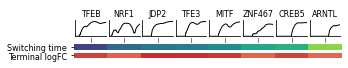

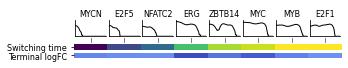

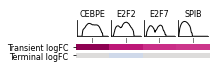

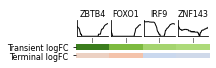

In [2]:
#Determine branch with (starting node, ending node) from trajectory inference
#See example trajectory-blood
#Monocyte branch
branch=(0,1)
#Erythroid branch
# branch=(0,2)
#B cell branch
# branch=(0,3)

ans=d0.draw_discover(branch[0],branch[1])


For customization through keyword parameters, see
* `?d0.draw_discover`
* `?dictys.plot.dynamic.fig_discover`
* `?dictys.plot.dynamic.draw_discover1`

## Number of top TFs to discover

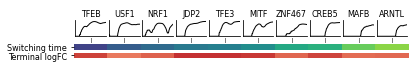

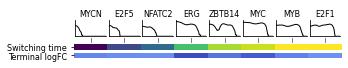

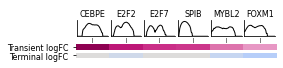

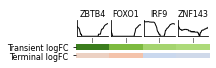

In [3]:
ans=d0.draw_discover(branch[0],branch[1],ntops=(10,8,6,4))


## Changing layout
Compact layout with two levels

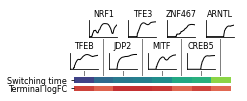

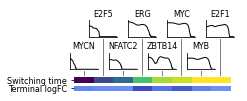

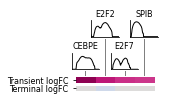

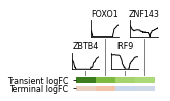

In [4]:
ans=d0.draw_discover(branch[0],branch[1],inset_lvs=2,inset_size=(0.5,0.3),inset_space=(0.2,0.3))


Compact layout on two sides

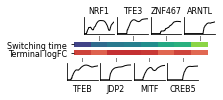

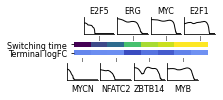

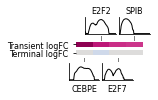

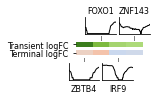

In [5]:
ans=d0.draw_discover(branch[0],branch[1],inset_sides=3)


Compact layout with two levels on two sides

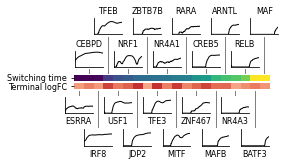

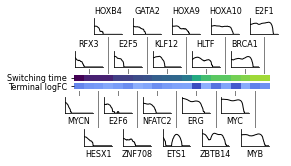

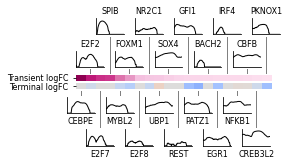

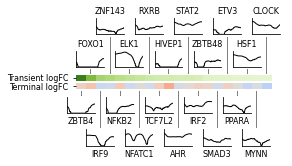

In [6]:
ans=d0.draw_discover(branch[0],branch[1],ntops=[20]*4,inset_lvs=2,inset_sides=3,inset_size=(0.5,0.3),inset_space=(0.2,0.3))


## Changing color map
Choosing colormap

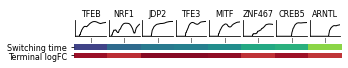

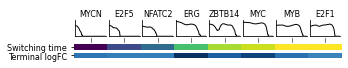

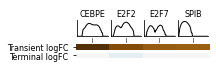

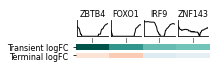

In [7]:
cmap={
	'Terminal logFC':'RdBu_r',
	'Switching time':'viridis',
	'Transient logFC':'BrBG_r',
}
ans=d0.draw_discover(branch[0],branch[1],cmap=cmap)


Draw colorbars


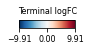

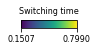

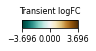

In [8]:
#Font size
fs=8
t1=reduce(or_,[x[2] for x in ans])
for xi0 in range(len(t1)):
	xi=list(t1)[xi0]
	t2=t1[xi]
	ans2=colorbar(t2.cmap.name,t2.norm.vmin,t2.norm.vmax,orientation='horizontal',figsize=(1,0.15),title=xi,title_fontsize=fs)
	xticks=[t2.norm.vmin,0,t2.norm.vmax] if t2.norm.vmin*t2.norm.vmax<0 else [t2.norm.vmin,t2.norm.vmax]
	ans2[1].set_xticks(xticks)
	ans2[1].tick_params(axis='x',labelsize=fs)
	

## Fixing color range

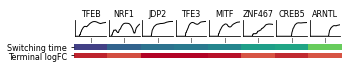

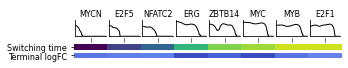

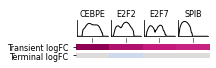

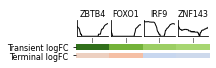

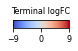

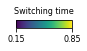

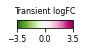

In [9]:
vrange={
	'Terminal logFC':[-9,9],
	'Transient logFC':[-3.5,3.5],
	'Switching time':[0.15,0.85],
}
ans=d0.draw_discover(branch[0],branch[1],vrange=vrange)

t1=reduce(or_,[x[2] for x in ans])
for xi0 in range(len(t1)):
	xi=list(t1)[xi0]
	t2=t1[xi]
	ans2=colorbar(t2.cmap.name,t2.norm.vmin,t2.norm.vmax,orientation='horizontal',figsize=(1,0.15),title=xi,title_fontsize=fs)
	xticks=[t2.norm.vmin,0,t2.norm.vmax] if t2.norm.vmin*t2.norm.vmax<0 else [t2.norm.vmin,t2.norm.vmax]
	ans2[1].set_xticks(xticks)
	ans2[1].tick_params(axis='x',labelsize=fs)
